# Image classification project in Machine Learning
### The main objects or components can include:

- **Dataset**: The collection of labeled images used for training and evaluating the machine learning model.

- **Preprocessing**: Preparing the image data for modeling, which may involve tasks such as resizing, normalization, and augmentation to enhance the quality and diversity of the dataset.

- **Model Architecture**: The design and structure of the machine learning model used for image classification. This can range from simple models like logistic regression or decision trees to more complex models like convolutional neural networks (CNNs).

- **Training**: The process of fitting the model to the training data, optimizing its parameters to minimize the error and improve its ability to classify images correctly.

- **Evaluation**: Assessing the performance of the trained model on a separate evaluation dataset. Common evaluation metrics for image classification include accuracy, precision, recall, and F1 score.

- **Hyperparameter Tuning**: Adjusting the hyperparameters of the model, such as learning rate, batch size, or number of layers, to optimize its performance on the evaluation dataset.

- **Predictions**: Using the trained model to classify new, unseen images and generate predictions or probabilities for each class label.

- **Model Deployment**: Integrating the trained model into an application or system where it can be used to classify images in real-world scenarios.

These objects/components are essential in an image classification project, and each plays a significant role in the overall process of building and deploying an effective image classification system.

### 1. Install Dependencies and Setup
- The "Install Dependencies and Setup" step involves installing and configuring the necessary software dependencies and libraries for your image classification project. This includes setting up a suitable Python environment, installing relevant libraries like NumPy, OpenCV, TensorFlow or PyTorch, and optionally configuring GPU support. Additionally, you should choose an IDE or code editor, determine data and model storage locations, set up version control, and establish a project structure. Proper setup ensures a smooth development process and enables you to focus on building and training your image classification models efficiently.

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [12]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
anyio                         3.6.2
appdirs                       1.4.4
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.2.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        6.0.0
boto3                         1.26.86
botocore                      1.29.86
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    5.3.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.0.1
click                         8.1.3
colorama                      0.4.6
comm                          0.1.2
contour

In [13]:
import tensorflow as tf
import os

In [14]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 2. Remove dodgy images
- The "Remove Dodgy Images" step is crucial in an image classification project as it involves filtering out problematic or low-quality images from the dataset. These images can negatively impact the performance and accuracy of the model. By assessing the data quality and implementing filters or criteria, such as setting thresholds for image quality metrics, you can automatically identify and remove dodgy images. This process ensures that the dataset used for training and evaluation is of higher quality, leading to more reliable and accurate results from the machine learning model.

In [16]:
import cv2
import imghdr

In [17]:
data_dir = 'data' 

In [18]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [19]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### 3. Load Data
- In the "Load Data" step of a machine learning project, the focus is on importing and preparing the dataset for further analysis. This involves reading the data from various sources, such as CSV files, databases, or APIs, and converting it into a format suitable for modeling.

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [22]:
data_iterator = data.as_numpy_iterator()

In [23]:
batch = data_iterator.next()

2023-07-04 23:17:08.742400: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


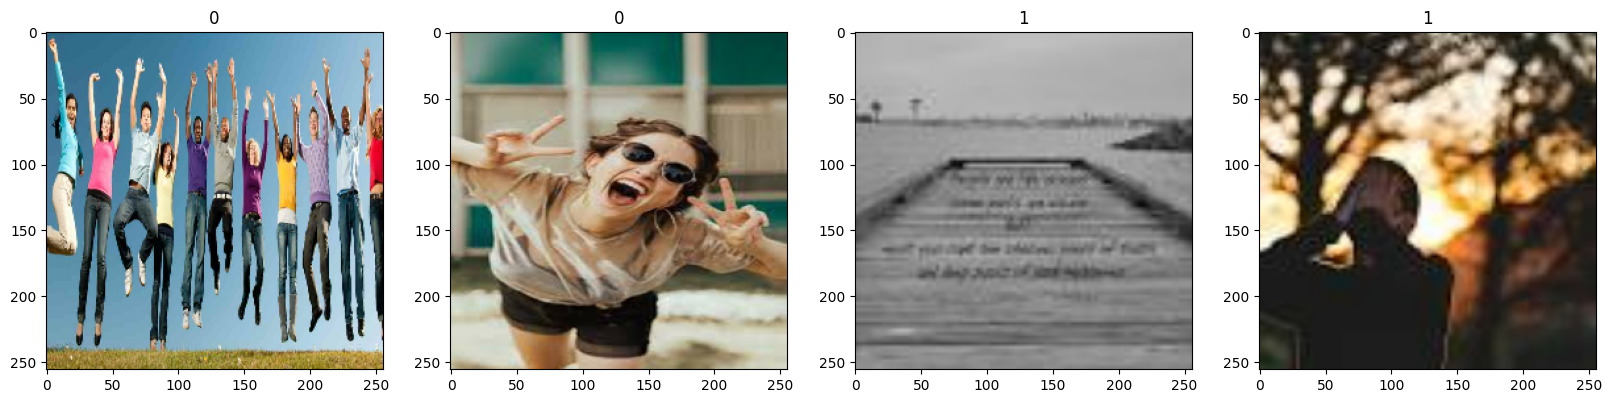

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 4. Scale Data
- Scaling data is an essential preprocessing step in machine learning to ensure that all features have comparable ranges and magnitudes. It involves transforming the data to have a standard scale, typically between 0 and 1 or with a mean of 0 and a standard deviation of 1. Common scaling techniques include Min-Max scaling and Standardization (Z-score scaling). Scaling is particularly important when using algorithms sensitive to the scale of features, such as distance-based methods or gradient-based optimization algorithms.



In [25]:
data = data.map(lambda x,y: (x/255, y))

In [26]:
data.as_numpy_iterator().next()

(array([[[[6.56786188e-02, 5.78354783e-02, 6.17570467e-02],
          [6.56786188e-02, 5.78354783e-02, 6.17570467e-02],
          [6.56786188e-02, 5.78354783e-02, 6.17570467e-02],
          ...,
          [4.28130597e-01, 2.83032566e-01, 2.08522752e-01],
          [4.27865475e-01, 2.86689013e-01, 2.00155929e-01],
          [4.29172367e-01, 2.87995905e-01, 1.93878263e-01]],
 
         [[5.97809441e-02, 5.19378074e-02, 5.58593757e-02],
          [5.97809441e-02, 5.19378074e-02, 5.58593757e-02],
          [5.97809441e-02, 5.19378074e-02, 5.58593757e-02],
          ...,
          [4.17974800e-01, 2.75840908e-01, 1.92438632e-01],
          [4.27359074e-01, 2.86182612e-01, 1.98881745e-01],
          [3.99864882e-01, 2.58688420e-01, 1.64570749e-01]],
 
         [[5.98422177e-02, 5.19990809e-02, 5.59206493e-02],
          [5.98422177e-02, 5.19990809e-02, 5.59206493e-02],
          [5.98422177e-02, 5.19990809e-02, 5.59206493e-02],
          ...,
          [4.28352267e-01, 2.87175804e-01, 1.9305

### 5. Split Data
- The "Split Data" step involves dividing the dataset into separate subsets for training and evaluation. The data is typically divided into two or three sets: the training set, the validation set (optional), and the test set. The training set is used to train the machine learning model, the validation set is used for hyperparameter tuning and model selection (if applicable), and the test set is used to assess the model's performance on unseen data. Proper data splitting is crucial to avoid overfitting and to obtain a realistic estimate of the model's generalization performance. Common ratios for data splitting are 70-30, 80-20, or 60-20-20, depending on the size of the dataset and the complexity of the model.

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [28]:
train_size

7

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model
Building a deep learning model involves designing a neural network architecture suited to the task at hand. This includes selecting a deep learning framework like TensorFlow or PyTorch, and designing the network layers and connections. The architecture is defined based on the problem type, such as classification or regression. The design process involves choosing the appropriate types of layers (e.g., convolutional, recurrent, or dense), determining their sizes and connectivity, and adding activation functions and regularization techniques. The goal is to create a model that can learn meaningful representations from the data and make accurate predictions. Iterative experimentation and fine-tuning are often performed to optimize the model's performance.

In [30]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-07-04 23:17:12.213146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 1.3959 - accuracy: 0.5268

2023-07-04 23:17:14.573921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 4s 371ms/step - loss: 1.3959 - accuracy: 0.5268 - val_loss: 0.6902 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 4s 361ms/step - loss: 0.6764 - accuracy: 0.5223 - val_loss: 0.6279 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 11s 2s/step - loss: 0.6187 - accuracy: 0.7143 - val_loss: 0.5122 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 4s 385ms/step - loss: 0.5459 - accuracy: 0.7188 - val_loss: 0.4664 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 4s 353ms/step - loss: 0.4237 - accuracy: 0.8393 - val_loss: 0.3832 - val_accuracy: 0.8594
Epoch 6/20
7/7 [==============================] - 3s 352ms/step - loss: 0.3741 - accuracy: 0.8482 - val_loss: 0.3385 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 4s 353ms/step - loss: 0.2930 - accuracy: 0.9152 - val_loss: 0.2740 - val_accuracy: 0.8906
Epoch 8/20
7/7 [=================

### 8. Plot Performance

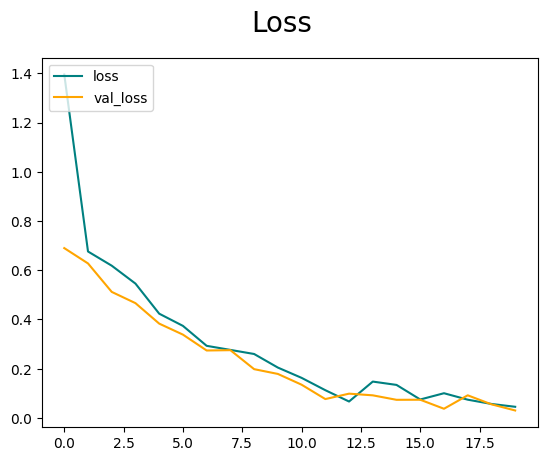

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

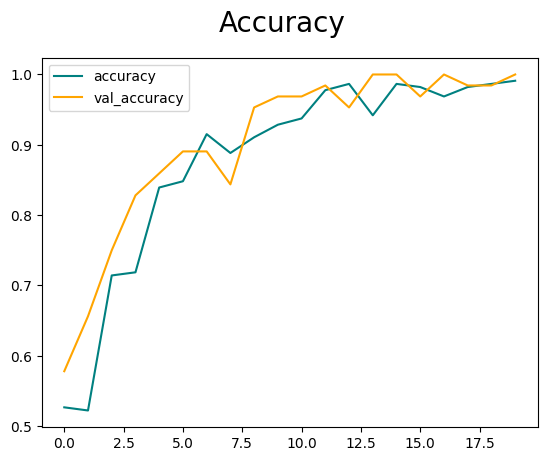

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 9. Evaluate

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-07-04 23:18:33.528085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 393ms/step


In [44]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


### 10. Test

In [45]:
import cv2

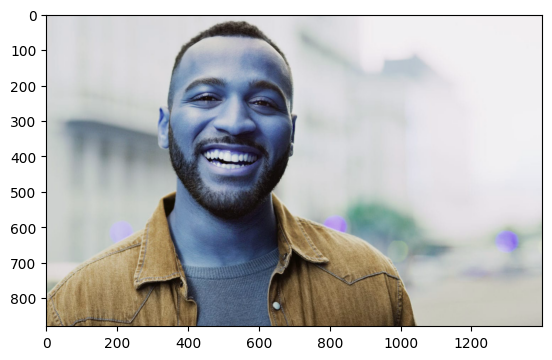

In [62]:
img = cv2.imread('05-12-21-happy-people.jpg')
plt.imshow(img)
plt.show()

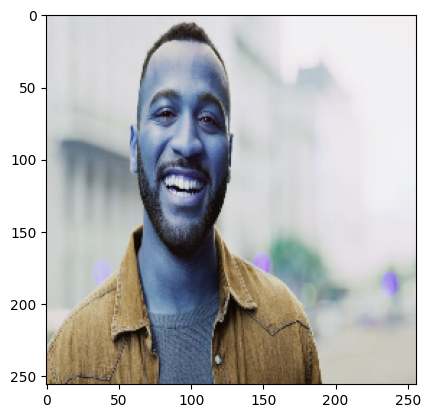

In [63]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [65]:
yhat

array([[0.00588841]], dtype=float32)

In [66]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


### 11. Save the Model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save(os.path.join('models','imageclassifier.h5'))

In [59]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [60]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 80ms/step


2023-07-04 23:20:28.843804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.00178801]], dtype=float32)